In [89]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

In [90]:
df = pd.read_csv("Churn_Modelling.csv")

In [91]:
df.shape

(10000, 14)

In [92]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
df.drop(["RowNumber", "CustomerId","Surname"], axis =1, inplace = True)

In [94]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### No null values

In [96]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [97]:

df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [98]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [99]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [100]:
 df_1 = pd.get_dummies(data=df, columns=['Geography'])

In [101]:
df_1


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [102]:
df_1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [103]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()
df_1[columns_to_scale] = scaler.fit_transform(df_1[columns_to_scale])

In [104]:
df_1.shape

(10000, 13)

In [105]:
df_1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [106]:
X = df_1.drop('Exited',axis='columns')
y = df_1['Exited']

In [107]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation ='relu'),
    keras.layers.Dense(1, activation ='sigmoid')
])

In [109]:
model.compile(optimizer = 'SGD',loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
210/210 [==============================] - 1s 1ms/step - loss: 0.5819 - accuracy: 0.7494
Epoch 2/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7919
Epoch 3/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7919
Epoch 4/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7919
Epoch 5/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7919
Epoch 6/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7919
Epoch 7/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7922
Epoch 8/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7922
Epoch 9/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7930
Epoch 10/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4741 - accura

210/210 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8163
Epoch 82/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8182
Epoch 83/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8157
Epoch 84/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4219 - accuracy: 0.8179
Epoch 85/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4212 - accuracy: 0.8163
Epoch 86/100
210/210 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8167
Epoch 87/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8194
Epoch 88/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8207
Epoch 89/100
210/210 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8215
Epoch 90/100
210/210 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 

In [123]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8345


[0.3941977024078369, 0.8345454335212708]

In [124]:
y_predict= model.predict(X_test)

104/104 [==============================] - 0s 1ms/step


In [125]:
y_predict[:10]

array([[0.17957164],
       [0.10375264],
       [0.3411321 ],
       [0.42075625],
       [0.05331432],
       [0.03918768],
       [0.26163712],
       [0.13969943],
       [0.37827167],
       [0.424165  ]], dtype=float32)

In [126]:
y_pred = []
for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [127]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Text(95.72222222222221, 0.5, 'Truth')

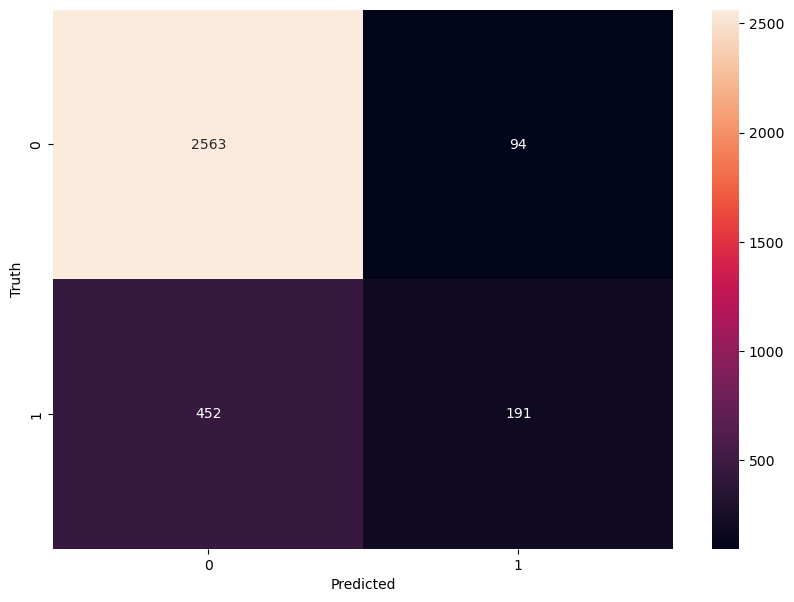

In [128]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [129]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2657
           1       0.67      0.30      0.41       643

    accuracy                           0.83      3300
   macro avg       0.76      0.63      0.66      3300
weighted avg       0.82      0.83      0.81      3300

